# EXPLANATIONS

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import cv2

from robot_vision.recognition import predefined

from robot_vision.recognition.predefined import PREDEFINED_RECOGNIZERS
from robot_vision.explanation.predefined import PREDEFINED_EXPLAINERS

from robot_vision.utils import plotting

predefined.MODELS_FOLDER = '../robot_vision/models'
predefined.USER_FACES_FOLDER = '../robot_vision/user_faces'

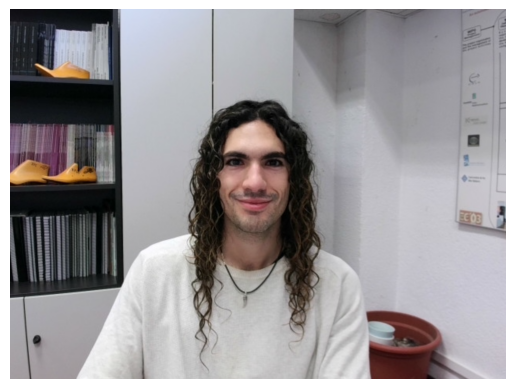

In [52]:
img_path = 'resources/happiness.png'
img = cv2.imread(img_path)
plotting.show_img(img)

## Facial Expression Recognition

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Xavi/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\w600k_r50.onnx recognition
set det-size: (64, 64)
1/1 [==============================] - 0s 226ms/step


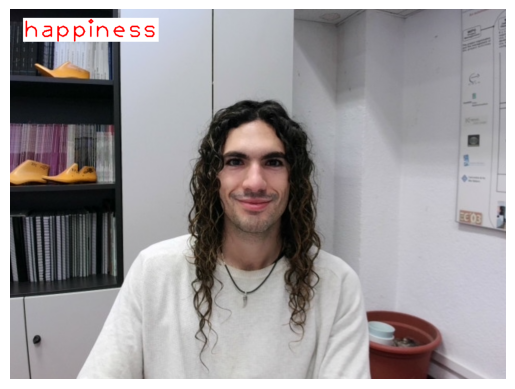

In [53]:
facial_expression_recognizer = predefined.PREDEFINED_RECOGNIZERS['expression']['VGG19']()
expression = facial_expression_recognizer.get_facial_expression(img)
plotting.show_img(plotting.draw_detections(img, expression=expression))

### LIME

C:\Users\Xavi\AppData\Roaming\Python\Python38\site-packages\skimage\_shared\utils.py:316: FutureWarning: Input image is 2D: spacing number of elements must be 2. In the future, a ValueError will be raised.
  return func(*args, **kwargs)
100%|██████████| 1001/1001 [00:16<00:00, 61.79it/s]


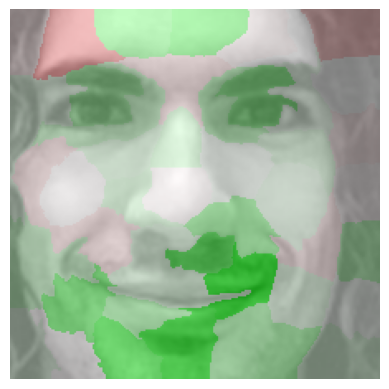

In [47]:
explainer = PREDEFINED_EXPLAINERS['lime']
exp_img = facial_expression_recognizer.get_explanation(img, explainer)
plotting.show_img(exp_img)

### RISE

100%|██████████| 1001/1001 [00:19<00:00, 50.31it/s]


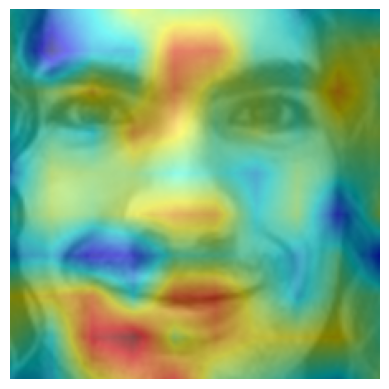

In [45]:
explainer = PREDEFINED_EXPLAINERS['rise']
exp_img = facial_expression_recognizer.get_explanation(img, explainer)
plotting.show_img(exp_img)

### KERNEL SHAP

100%|██████████| 1/1 [00:04<00:00,  4.40s/it]


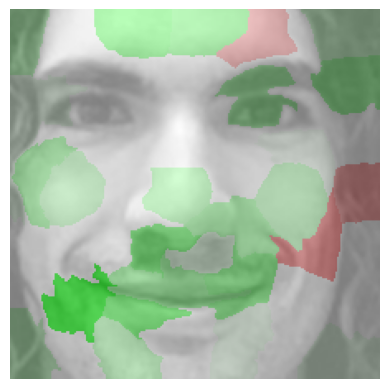

In [7]:
explainer = PREDEFINED_EXPLAINERS['kernel_shap']
exp_img = facial_expression_recognizer.get_explanation(img, explainer)
plotting.show_img(exp_img)

### OCCLUSION







100%|██████████| 26/26 [00:00<00:00, 77.25it/s]

[<tf.Tensor: shape=(6,), dtype=float32, numpy=array([          0,           0,           0,           1,           0,           0], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=array([          0,           0,           0,           1,           0,           0], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=array([          0,           0,           0,           1,           0,           0], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=array([          0,           0,           0,           1,           0,           0], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=array([          0,           0,           0,           1,           0,           0], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=array([          0,           0,           0,           1,           0,           0], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=array([          0,           0,           0,           1,        

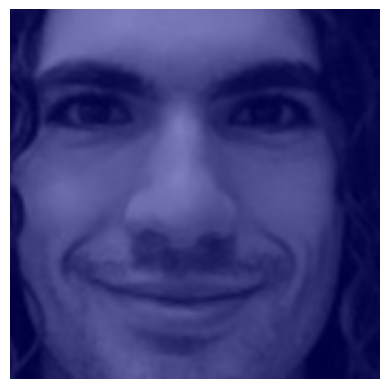

In [54]:
explainer = PREDEFINED_EXPLAINERS['occlusion_sensitivity']
exp_img = facial_expression_recognizer.get_explanation(img, explainer)
plotting.show_img(exp_img)

### LOCO

100%|██████████| 15/15 [00:00<00:00, 518.06it/s]


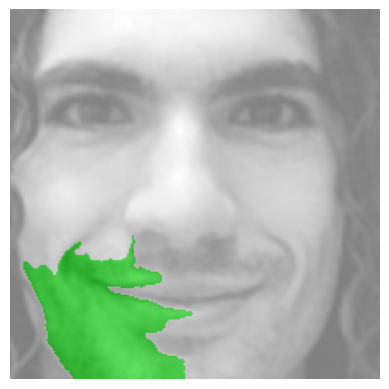

In [29]:
explainer = PREDEFINED_EXPLAINERS['loco']
exp_img = facial_expression_recognizer.get_explanation(img, explainer)
plotting.show_img(exp_img)

### UNIVARIATE

100%|██████████| 15/15 [00:00<00:00, 153.96it/s]


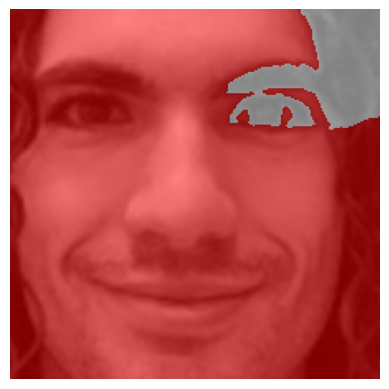

In [33]:
explainer = PREDEFINED_EXPLAINERS['univariate']
exp_img = facial_expression_recognizer.get_explanation(img, explainer)
plotting.show_img(exp_img)

### SHAP

100%|██████████| 2302/2302 [00:09<00:00, 248.29it/s]


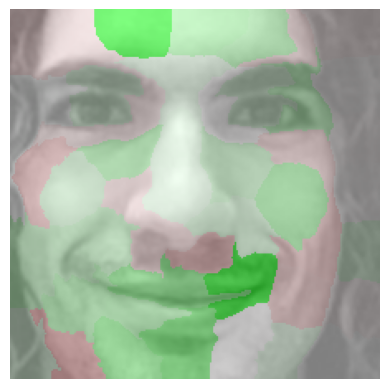

In [13]:
explainer = PREDEFINED_EXPLAINERS['shap']
exp_img = facial_expression_recognizer.get_explanation(img, explainer)
plotting.show_img(exp_img)

## Gender Estimation: MiVOLO

Model summary (fused): 268 layers, 68125494 parameters, 0 gradients


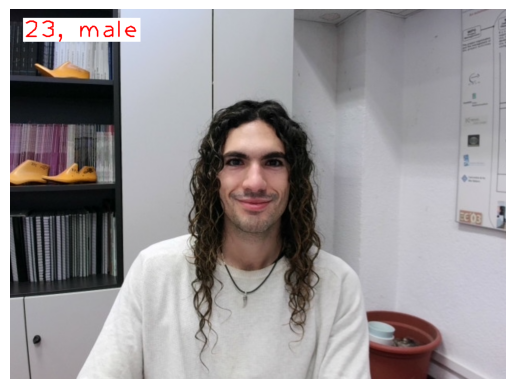

In [54]:
age_gender_detector = predefined.PREDEFINED_RECOGNIZERS['age_gender']['MiVOLO']()
age, gender = age_gender_detector.get_age_gender(img)
plotting.show_img(plotting.draw_detections(img, age=age, gender=gender))

Model summary (fused): 268 layers, 68125494 parameters, 0 gradients


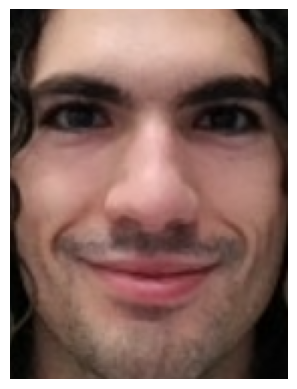

In [55]:
face_detector = PREDEFINED_RECOGNIZERS['face_detection']['YOLOv8']()
bbox = face_detector.get_bbox(img)
face_img = img[bbox[1]:bbox[3], bbox[0]:bbox[2]]
plotting.show_img(face_img)

### LIME

100%|██████████| 1001/1001 [01:14<00:00, 13.47it/s]


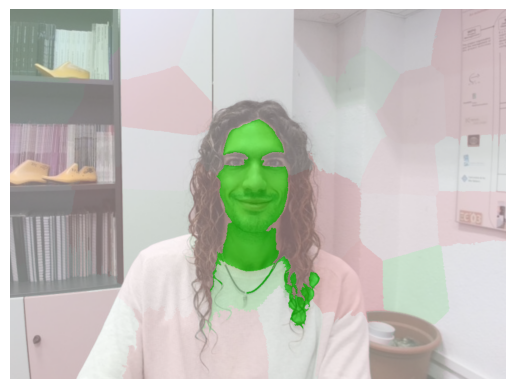

In [22]:
explainer = PREDEFINED_EXPLAINERS['lime']
exp_img = age_gender_detector.get_explanation(img, explainer)
plotting.show_img(exp_img)

100%|██████████| 1001/1001 [00:40<00:00, 24.83it/s]


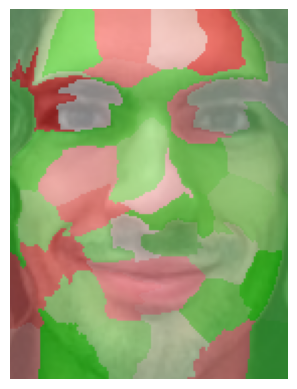

In [ ]:
explainer = PREDEFINED_EXPLAINERS['lime']
exp_img = age_gender_detector.get_explanation(face_img, explainer)
plotting.show_img(exp_img)